In [1]:
#Installing Packages
using Pkg
Pkg.add("DynamicalSystems")
Pkg.add("DifferentialEquations")
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [2]:
#Importing Libraries
using DynamicalSystems, DifferentialEquations, Plots

# The Rossler Differential Equations
The Rössler attractor is the attractor for the Rössler system, a system of three non-linear ordinary differential equations originally studied by Otto Rössler in the 1970s.These differential equations define a continuous-time dynamical system that exhibits chaotic dynamics associated with the fractal properties of the attractor.

$$
\begin{aligned}
\dot{x} & = - y - z\\
\dot{y} & = x + ay\\
\dot{z} & = b + z(x-c)\\
\end{aligned}
$$

In [7]:
#Defining the Rossler Differential Equations
function rossler!(du,u,p,t)
    x,y,z = u
    a,b,c = p
    
    du[1] = -y - z
    du[2] = x + a*y
    du[3] = b + z*(x-c)
    return nothing
end

rossler! (generic function with 1 method)

In [8]:
initial = [1.0,0.0,0.0] #Initial Conditions
parameters = [0.2,0.2,5.7] #Value of a,b and c
time_span = (0.0,100.0) #Time span of the equations

prob = ODEProblem(rossler!,initial,time_span,parameters) #Defining the ODE
sol = solve(prob,Tsit5()) #Solving the ODE

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 366-element Vector{Float64}:
   0.0
   0.0009796010746163039
   0.010775611820779343
   0.04141605188945525
   0.09117641677578664
   0.15489217464244467
   0.23828977591915618
   0.340574891104994
   0.4652421276461706
   0.6131630049515334
   0.787630774864015
   0.9915545893385009
   1.2307971499158241
   ⋮
  97.48029657670203
  97.65436757133199
  97.83491223433207
  98.02388796779692
  98.22356270323272
  98.44004876660907
  98.68449262207334
  98.96184571494622
  99.21814726561426
  99.47686643771155
  99.75607471778657
 100.0
u: 366-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9999994243448546, 0.0009796968547206475, 0.00019546988570004638]
 [0.9999304842231985, 0.01078698158523846, 0.002101458232273629]
 [0.9989792092252597, 0.04157390553706528, 0.00752680613293894]
 [0.9950972399807939, 0.09186250362859445, 0.014829618340006998]
 [0.9859990095432031, 0.15658307526133716, 0.02199414515631154]

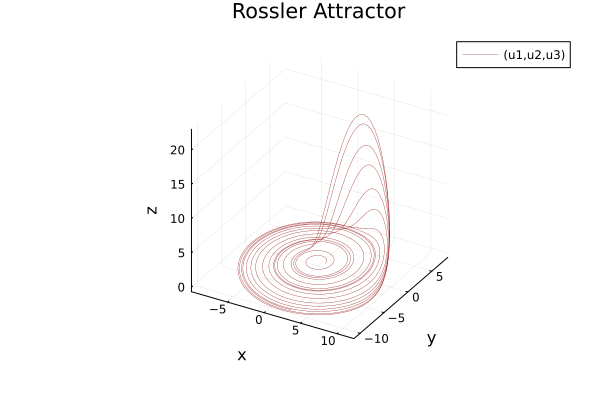

In [9]:
#Plotting the solution of ODE
plot(sol, idxs=(1,2,3), xlabel="x", ylabel="y", zlabel="z", title="Rossler Attractor", lw=0.3, color=:redsblues)

[ Info: Saved animation to /home/past/repos/NonLinearDynamics/Animations/rosslerAnimation.gif


Plots.AnimatedGif("/home/past/repos/NonLinearDynamics/Animations/rosslerAnimation.gif")
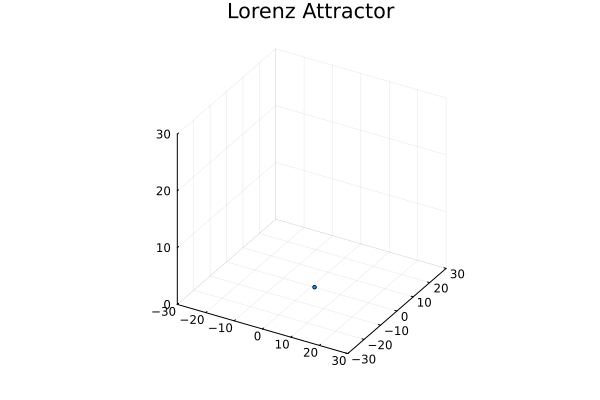

In [12]:
#Animating the Rossler Attractor
Base.@kwdef mutable struct rossler
    dt::Float64 = 0.02
    a::Float64 = 0.2
    b::Float64 = 0.2
    c::Float64 = 5.7
    x::Float64 = 1
    y::Float64 = 0
    z::Float64 = 0
end

function step!(l::rossler)
    dx = (-l.y - l.z)
    dy = l.x + l.a*l.y
    dz = l.b + l.z*(l.x-l.c)
    l.x += l.dt * dx
    l.y += l.dt * dy
    l.z += l.dt * dz
end

attractor = rossler()

plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 30),
    title = "Lorenz Attractor",
    legend = false,
    marker = 2,
)

anim = @animate for i=1:5000   
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10
gif(anim,"Animations/rosslerAnimation.gif",fps=60)